# Data Exploration


In [ ]:
# dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import soundfile as sf
import matplotlib.pyplot as plt
import soundfile as sf
import matplotlib.pyplot as plt

In [105]:
# data
df_german = pd.read_csv(r'.\Data\German\data_path_german.csv')
df_urdu = pd.read_csv(r'.\Data\Urdu\data_path_urdu.csv')


In [106]:
# functions
def print_audio_basic_info(y, sr):
    print(f"Sampling Rate: {sr}, Duration of the file: {len(y)/sr:.2f} seconds")

def plot_waveform(ax, y, sr, title):
    ax.plot(y)
    ax.set_title(title)
    ax.set_xlabel("Samples")
    ax.set_ylabel("Amplitude")

def plot_spectrogram(ax, y, sr, title):
    ax.specgram(y, Fs=sr, cmap="inferno")
    ax.set_title(title)
    ax.set_xlabel("Time (Seconds)")
    ax.set_ylabel("Frequency (Hz)")

def calculate_rms_energy(y, sr, frame_size_ms=100):
    frame_size = int(sr * frame_size_ms / 1000)  # convert ms to samples
    rms_energy = np.array([
        np.sqrt(np.mean(y[i:i + frame_size] ** 2))
        for i in range(0, len(y) - frame_size, frame_size)
    ])
    return rms_energy

def plot_rms_energy(ax, energy, title):
    ax.plot(energy)
    ax.set_title(title)
    ax.set_xlabel("Frames")
    ax.set_ylabel("RMS Energy")

def calculate_zcr(y, sr, frame_size_ms=100):
    frame_size = int(sr * frame_size_ms / 1000)
    zcr = np.array([
        np.sum(np.abs(np.diff(np.sign(y[i:i + frame_size])))) / frame_size
        for i in range(0, len(y) - frame_size, frame_size)
    ])
    return zcr

def plot_zero_crossing(ax, zcr, title):
    ax.plot(zcr)
    ax.set_title(title)
    ax.set_xlabel("Frames")
    ax.set_ylabel("Zero-Crossing Rate")



## Urdu

Angry
Sampling Rate: 44100, Duration of the file: 2.00 seconds
Happy
Sampling Rate: 44100, Duration of the file: 2.00 seconds
Sad
Sampling Rate: 44100, Duration of the file: 2.00 seconds
Neutral
Sampling Rate: 44100, Duration of the file: 2.00 seconds


c:\Users\Julia\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_axes.py:8233: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


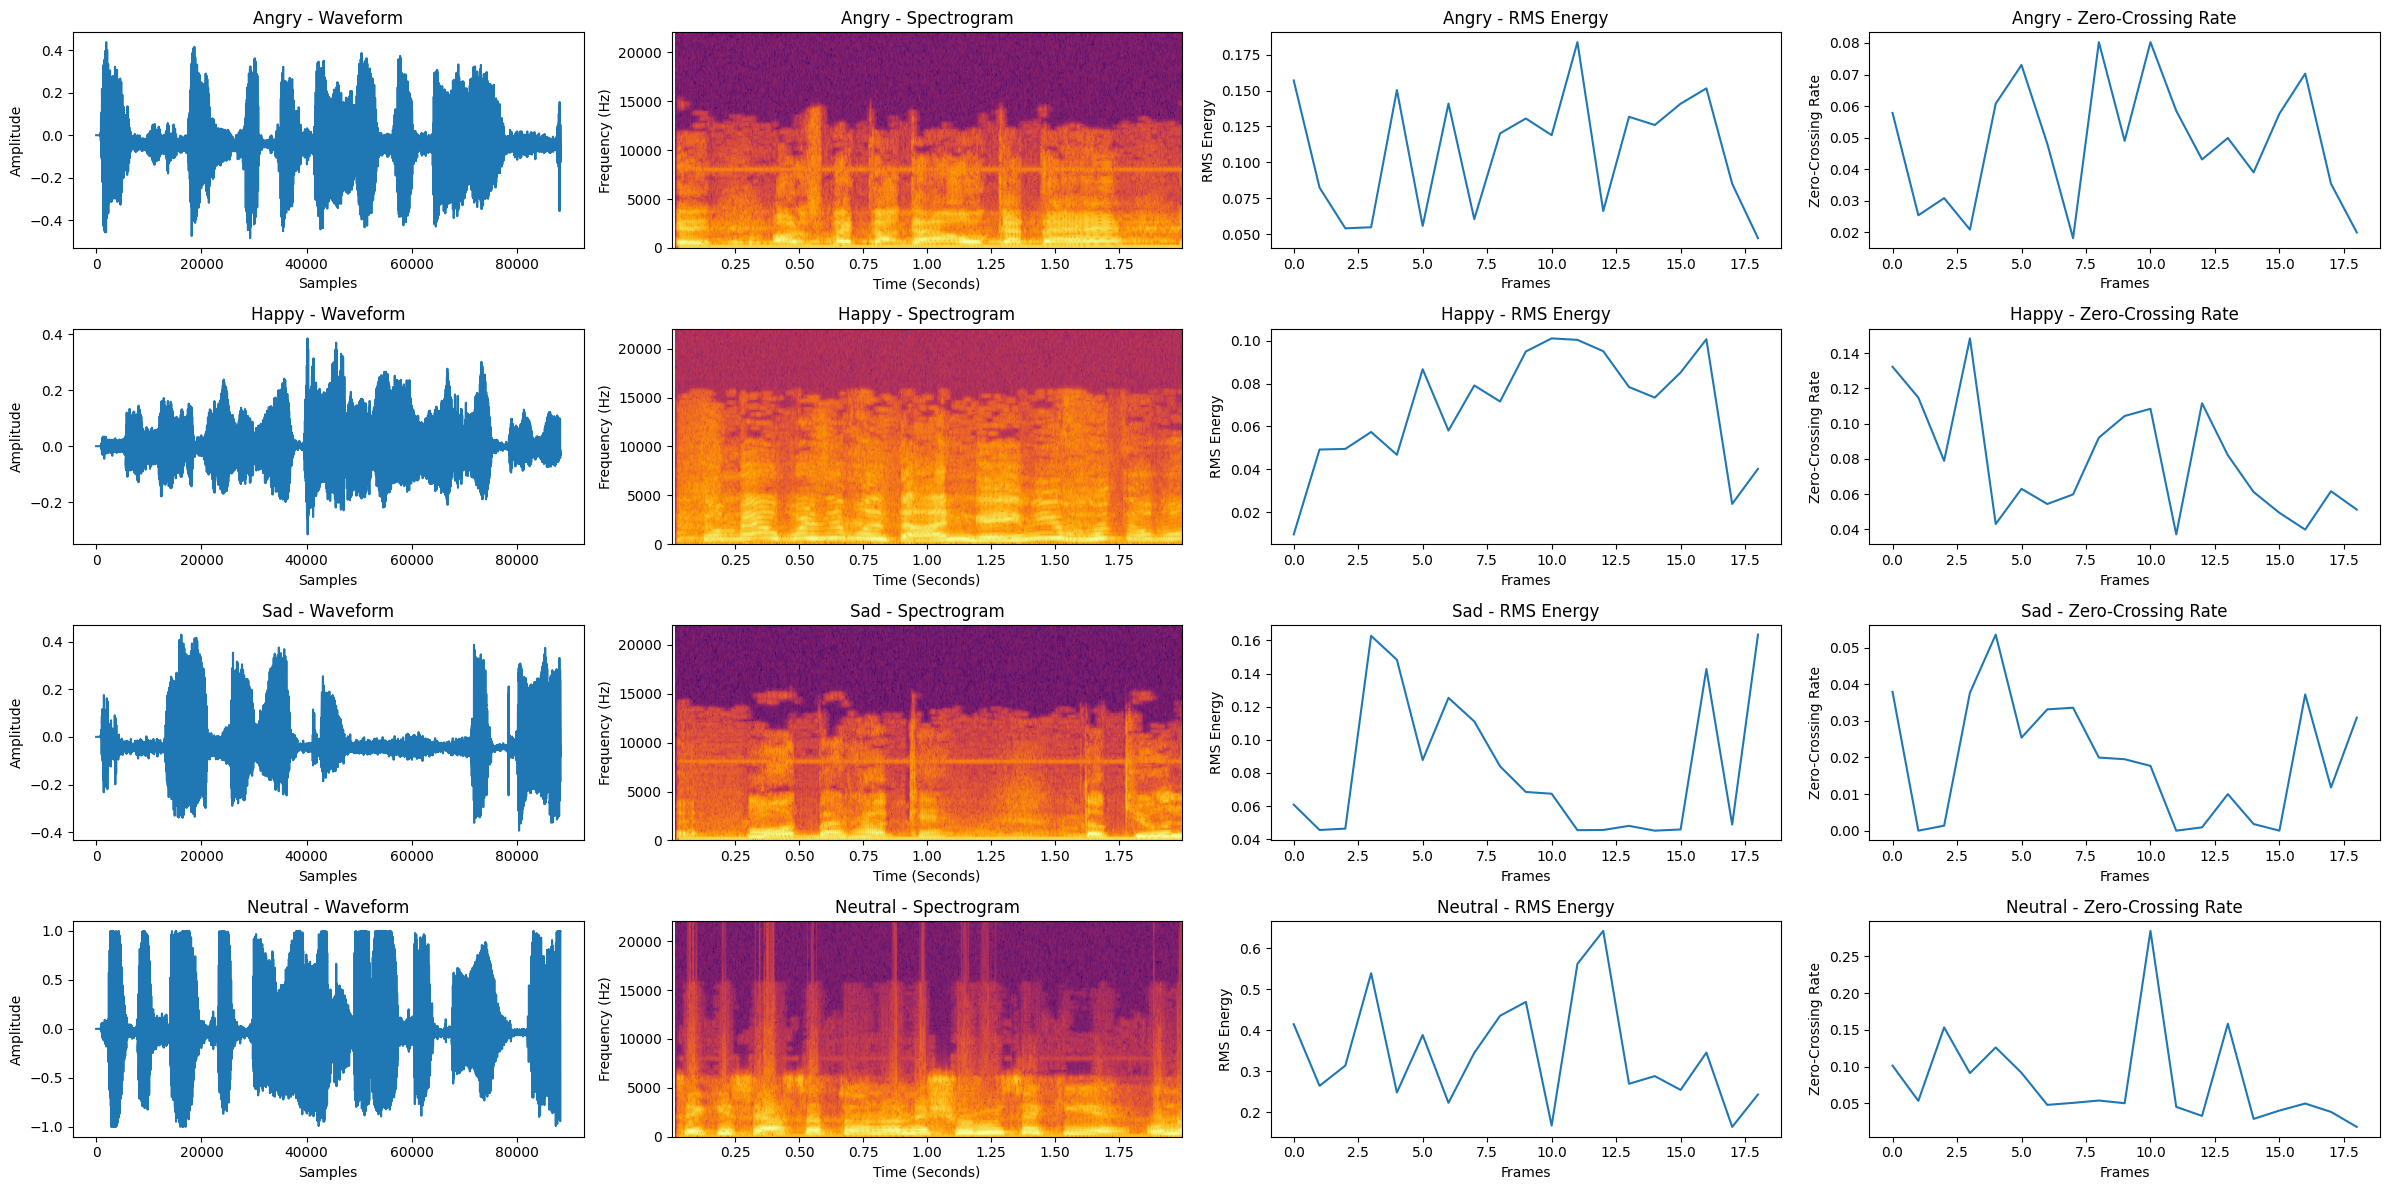

In [107]:

emotions = ["Angry", "Happy", "Sad", "Neutral"]
audio_paths = [
    r"Data\Urdu\Angry\SM1_F1_A01.wav",
    r"Data\Urdu\Happy\SF1_F1_H01.wav",
    r"Data\Urdu\Sad\SF10_F1_S01.wav",
    r"Data\Urdu\Neutral\SF9_F1_N01.wav"
]


fig, axes = plt.subplots(len(emotions), 4, figsize=(24, 12))

for i, (emotion, path) in enumerate(zip(emotions, audio_paths)):
    y, sr = sf.read(path)
    print(emotion)
    print_audio_basic_info(y, sr)

    plot_waveform(axes[i, 0], y, sr, f"{emotion} - Waveform")
    plot_spectrogram(axes[i, 1], y, sr, f"{emotion} - Spectrogram")
    plot_rms_energy(axes[i, 2], calculate_rms_energy(y, sr), f"{emotion} - RMS Energy")
    plot_zero_crossing(axes[i, 3], calculate_zcr(y, sr), f"{emotion} - Zero-Crossing Rate")

plt.tight_layout()
plt.show()

#### Interpretation
* Waveform (Visualizes amplitude over time): Anger typically has higher peaks and more variability. Sadness is smoother with lower intensity.
* Spectrogram (Displays frequency content over time): Anger and happiness show more energy across frequencies, while sadness has a darker (weaker) appearance.
* RMS (Measures loudness variation over time): Anger has the most dynamic loudness, while sadness is more subdued and smoother.
* Zero-Crossing Rate: ??

# German

In [108]:
# Select one file per emotion 
emotions = ['happiness', 'neutral', 'anger', 'sadness', 'boredom', 'disgust', 'fear']
emotion_samples = df_german[df_german['emotion'].isin(emotions)].groupby('emotion').first().reset_index()
emotion_samples

emotion                                           filename  speaker_id  \
0      anger  C:\Users\Julia\Documents\Uni\Speech-Emotion-Re...           3   
1    boredom  C:\Users\Julia\Documents\Uni\Speech-Emotion-Re...           3   
2    disgust  C:\Users\Julia\Documents\Uni\Speech-Emotion-Re...           3   
3       fear  C:\Users\Julia\Documents\Uni\Speech-Emotion-Re...           3   
4  happiness  C:\Users\Julia\Documents\Uni\Speech-Emotion-Re...           3   
5    neutral  C:\Users\Julia\Documents\Uni\Speech-Emotion-Re...           3   
6    sadness  C:\Users\Julia\Documents\Uni\Speech-Emotion-Re...           3   

   valence  
0        0  
1        0  
2        0  
3        0  
4        1  
5        1  
6        0

Processing: anger - C:\Users\Julia\Documents\Uni\Speech-Emotion-Recognition\Data\German\wav\03a01Wa.wav
Sampling Rate: 16000, Duration of the file: 1.88 seconds
anger
Sampling Rate: 16000, Duration of the file: 1.88 seconds
Processing: boredom - C:\Users\Julia\Documents\Uni\Speech-Emotion-Recognition\Data\German\wav\03a04Lc.wav
Sampling Rate: 16000, Duration of the file: 1.93 seconds
boredom
Sampling Rate: 16000, Duration of the file: 1.93 seconds
Processing: disgust - C:\Users\Julia\Documents\Uni\Speech-Emotion-Recognition\Data\German\wav\03b10Ec.wav
Sampling Rate: 16000, Duration of the file: 3.20 seconds
disgust
Sampling Rate: 16000, Duration of the file: 3.20 seconds
Processing: fear - C:\Users\Julia\Documents\Uni\Speech-Emotion-Recognition\Data\German\wav\03a04Ad.wav
Sampling Rate: 16000, Duration of the file: 1.50 seconds
fear
Sampling Rate: 16000, Duration of the file: 1.50 seconds
Processing: happiness - C:\Users\Julia\Documents\Uni\Speech-Emotion-Recognition\Data\German\wav\03

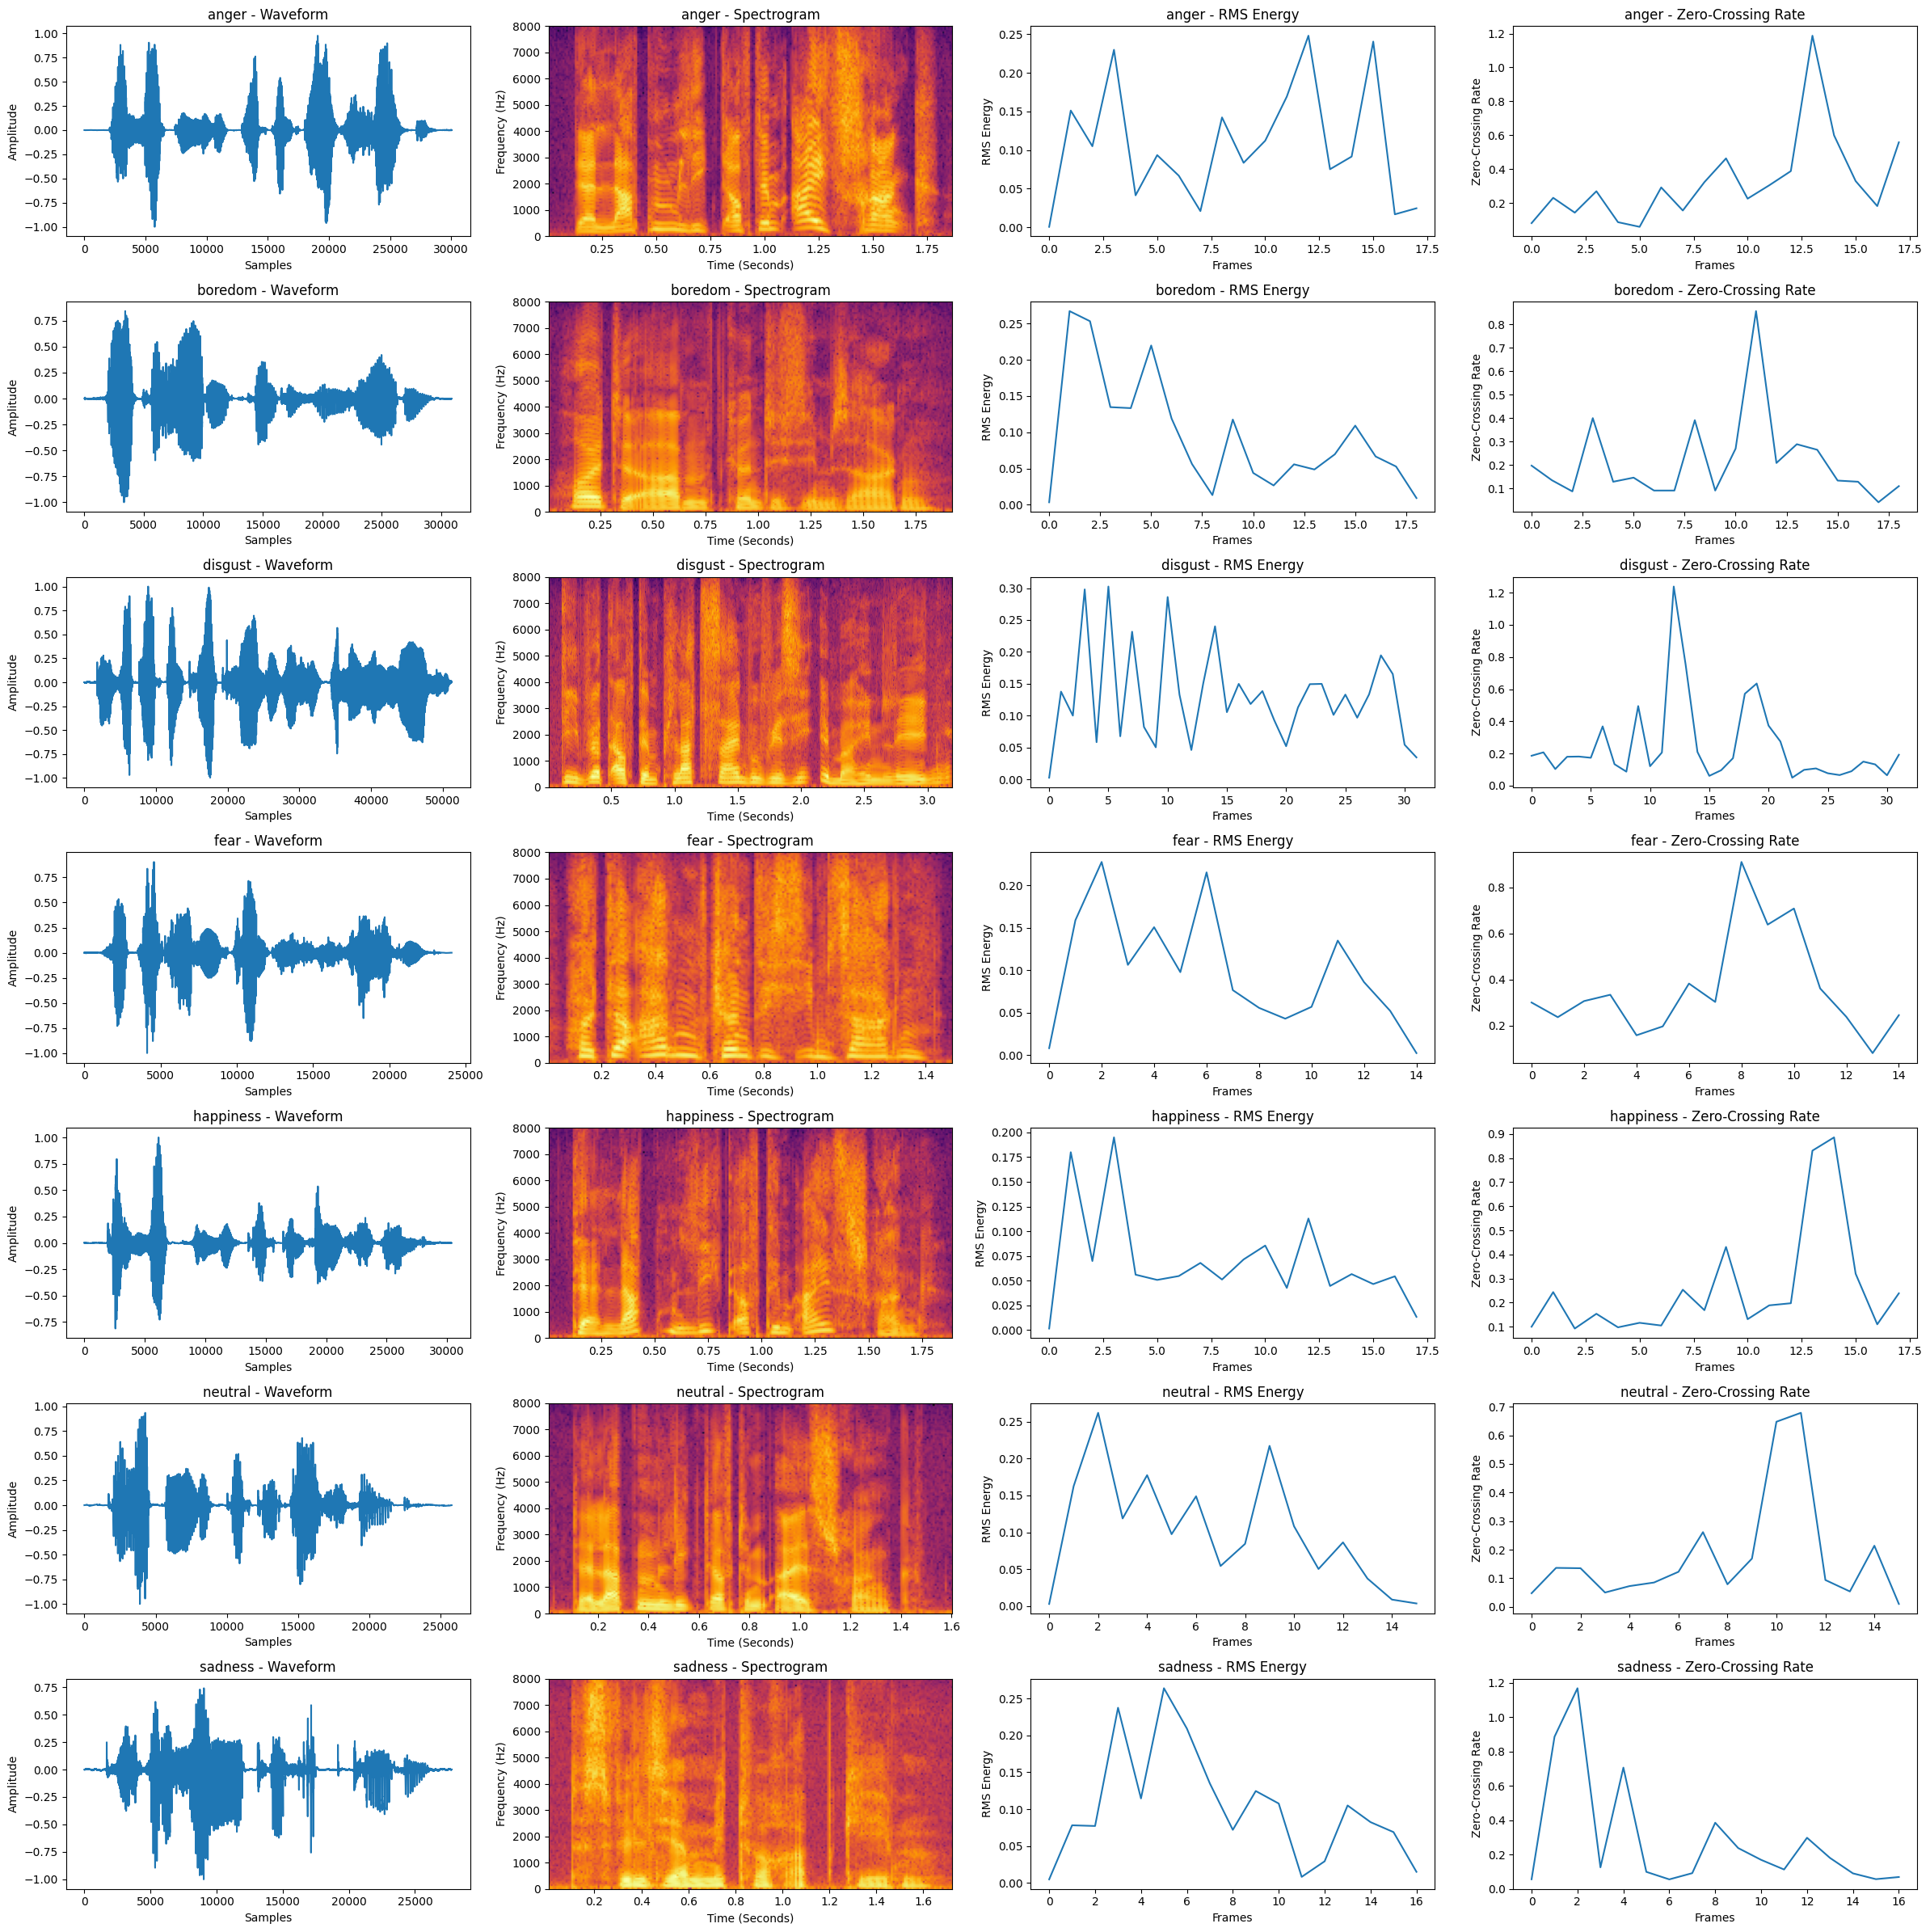

In [109]:

fig, axes = plt.subplots(len(emotion_samples), 4, figsize=(24, 24))

# Iterate through selected audio files and plot
for i, row in emotion_samples.iterrows():
    path = row['filename']
    emotion = row['emotion']

    # Load the audio
    y, sr = sf.read(path)
    print(f"Processing: {emotion} - {path}")
    print_audio_basic_info(y, sr)

    y, sr = sf.read(path)
    print(emotion)
    print_audio_basic_info(y, sr)

    plot_waveform(axes[i, 0], y, sr, f"{emotion} - Waveform")
    plot_spectrogram(axes[i, 1], y, sr, f"{emotion} - Spectrogram")
    plot_rms_energy(axes[i, 2], calculate_rms_energy(y, sr), f"{emotion} - RMS Energy")
    plot_zero_crossing(axes[i, 3], calculate_zcr(y, sr), f"{emotion} - Zero-Crossing Rate")

plt.tight_layout()
plt.show()

#### Interpretation
* Waveform (Visualizes amplitude over time): 
* Spectrogram (Displays frequency content over time): 
* RMS (Measures loudness variation over time): 
* Zero-Crossing Rate: 
